# CNN example

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

c:\Users\mairi\code\dudads-chapters\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
gpu = tf.config.list_physical_devices()[1]
tf.config.experimental.set_memory_growth(gpu,True)

The dataset is only partitioned into training and test sets, so we set aside 30% of the training set as a validation set.

In [3]:
(ds_train, ds_val, ds_test) = tfds.load(
    'rock_paper_scissors',
    split=['train[:70%]','train[70%:]','test'],
    shuffle_files=True,
    as_supervised=True,
)

In [4]:
ds_train = ds_train.batch(32)
ds_val = ds_val.batch(32)
ds_test= ds_test.batch(32)

In [19]:
input_shape = (300, 300, 3)
inputs = Input(shape=input_shape)

x = layers.Conv2D(16, (3, 3), activation='relu')(inputs) # convolution and detector step
x = layers.MaxPooling2D((2, 2))(x) # pooling step


x = layers.Flatten()(x) # flattenting for classification
outputs = layers.Dense(3, activation='softmax')(x) # 3 classes

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = model.fit(ds_train, epochs=10, validation_data=(ds_val))

Epoch 1/10
56/56 [==============================] - 3s 47ms/step - loss: 1682.0978 - accuracy: 0.5567 - val_loss: 1.7376 - val_accuracy: 0.9418
Epoch 2/10
56/56 [==============================] - 2s 44ms/step - loss: 0.6787 - accuracy: 0.9694 - val_loss: 0.6471 - val_accuracy: 0.9762
Epoch 3/10
56/56 [==============================] - 2s 44ms/step - loss: 0.0316 - accuracy: 0.9949 - val_loss: 0.5435 - val_accuracy: 0.9735
Epoch 4/10
56/56 [==============================] - 3s 44ms/step - loss: 0.0129 - accuracy: 0.9972 - val_loss: 0.5327 - val_accuracy: 0.9749
Epoch 5/10
56/56 [==============================] - 2s 43ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.5309 - val_accuracy: 0.9749
Epoch 6/10
56/56 [==============================] - 3s 45ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.5342 - val_accuracy: 0.9749
Epoch 7/10
56/56 [==============================] - 2s 44ms/step - loss: 2.6417e-04 - accuracy: 1.0000 - val_loss: 0.5340 - val_accuracy: 0.9749
Epoch 

Training and validation accuracy of 100%? If something seems too good to be true, it probably is. Let's evaluate on the test data.

In [21]:
model.evaluate(ds_test)

12/12 [==============================] - 0s 22ms/step - loss: 57.2471 - accuracy: 0.5188


[57.24712371826172, 0.5188171863555908]

As expected, no such luck. We will try adding another convolutional layer.

In [22]:
input_shape = (300, 300, 3)
inputs = Input(shape=input_shape)

x = layers.Conv2D(16, (3, 3), activation='relu')(inputs) # convolution and detector step
x = layers.MaxPooling2D((2, 2))(x) # pooling step

x = layers.Conv2D(32, (3, 3), activation='relu')(inputs) # convolution and detector step
x = layers.MaxPooling2D((2, 2))(x) # pooling step


x = layers.Flatten()(x) # flattenting for classification
outputs = layers.Dense(3, activation='softmax')(x) # 3 classes

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history = model.fit(ds_train, epochs=10, validation_data=(ds_val))

Epoch 1/10
56/56 [==============================] - 5s 84ms/step - loss: 5558.7100 - accuracy: 0.4422 - val_loss: 71.7813 - val_accuracy: 0.5992
Epoch 2/10
56/56 [==============================] - 5s 81ms/step - loss: 13.0998 - accuracy: 0.8486 - val_loss: 1.4216 - val_accuracy: 0.9286
Epoch 3/10
56/56 [==============================] - 4s 79ms/step - loss: 0.2293 - accuracy: 0.9841 - val_loss: 0.9181 - val_accuracy: 0.9696
Epoch 4/10
56/56 [==============================] - 5s 80ms/step - loss: 0.0154 - accuracy: 0.9972 - val_loss: 0.6667 - val_accuracy: 0.9841
Epoch 5/10
56/56 [==============================] - 5s 80ms/step - loss: 0.0339 - accuracy: 0.9960 - val_loss: 0.6910 - val_accuracy: 0.9788
Epoch 6/10
56/56 [==============================] - 4s 79ms/step - loss: 1.2313e-04 - accuracy: 1.0000 - val_loss: 0.7833 - val_accuracy: 0.9854
Epoch 7/10
56/56 [==============================] - 5s 80ms/step - loss: 0.0137 - accuracy: 0.9983 - val_loss: 0.8811 - val_accuracy: 0.9868
Epoc

In [24]:
model.evaluate(ds_test)

12/12 [==============================] - 1s 27ms/step - loss: 14.2611 - accuracy: 0.7715


[14.261115074157715, 0.7715053558349609]

That's better. Let's take a look at the learning curves and correctly and incorrectly classived images.

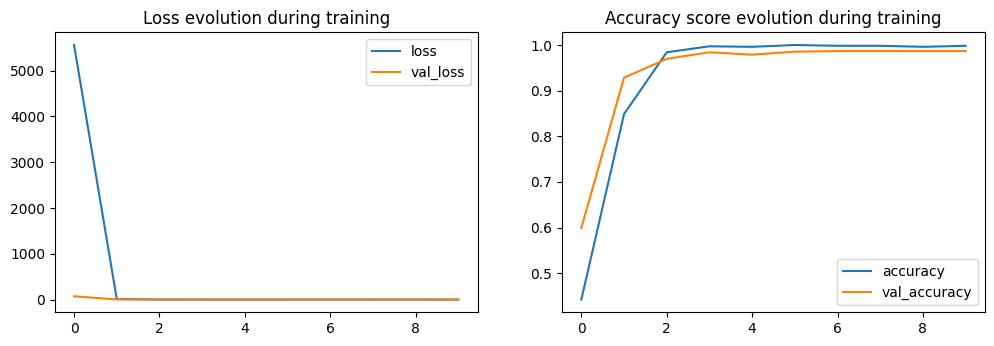

In [25]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Loss evolution during training')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy score evolution during training')
    plt.legend();

plot_learning_curves(history)

In [26]:
# Make predictions on the test set
test_images, test_labels = [], []
for images, labels in ds_test:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Identify correct and incorrect predictions
correct_predictions = predicted_labels == test_labels
incorrect_predictions = predicted_labels != test_labels

# Get indices for correct and incorrect predictions
correct_indices = np.where(correct_predictions)[0]
incorrect_indices = np.where(incorrect_predictions)[0]

12/12 [==============================] - 1s 50ms/step


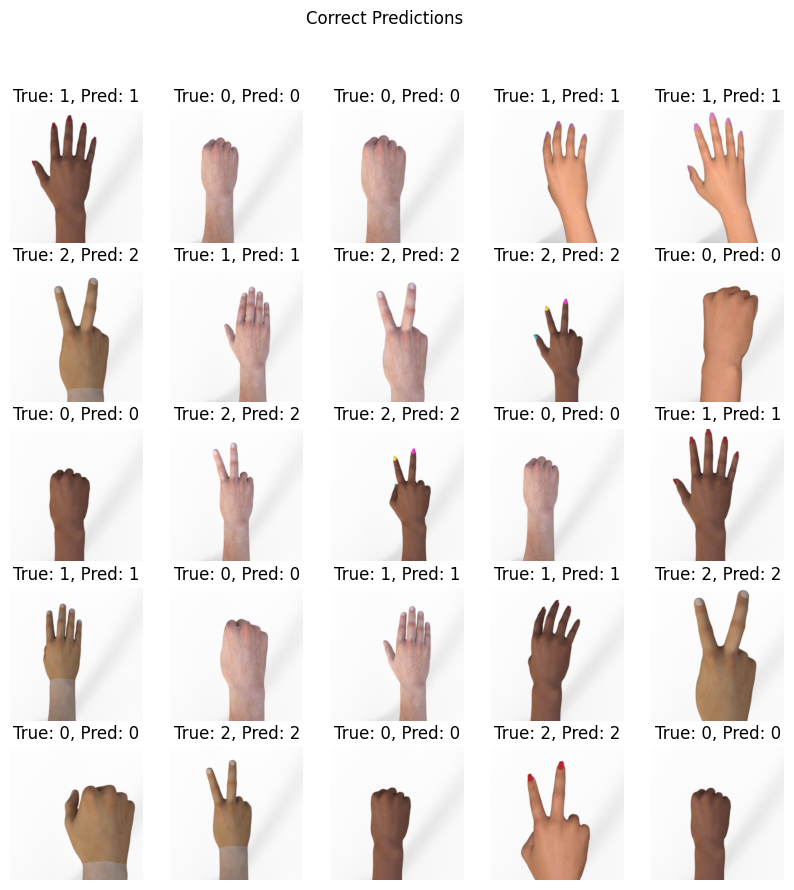

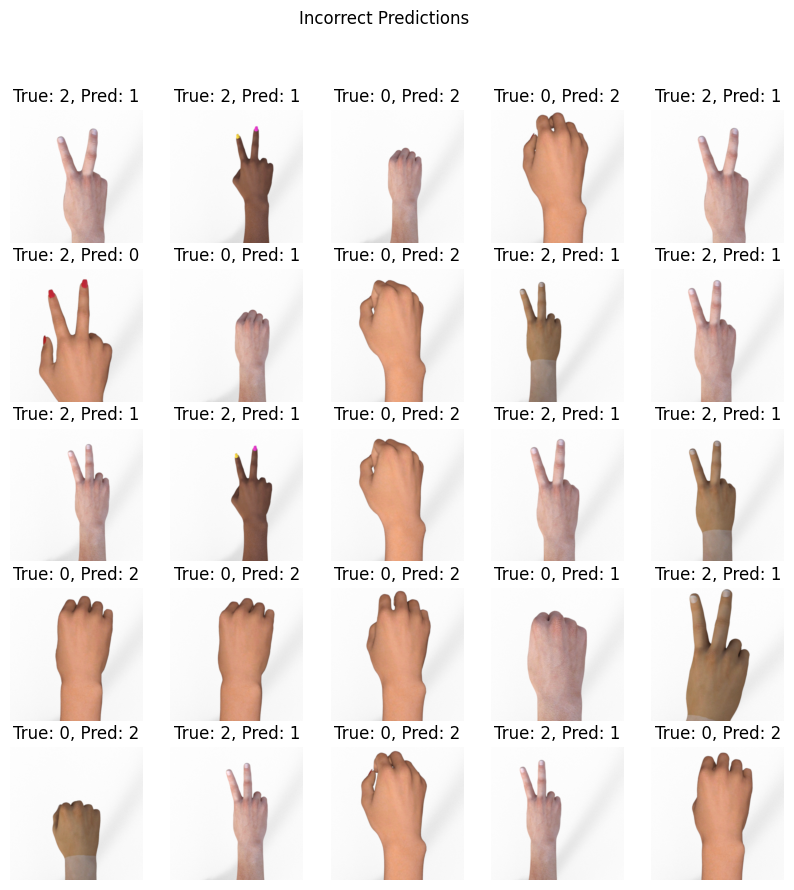

In [27]:
# Function to plot images with their predictions and true labels
def plot_predictions(images, true_labels, predicted_labels, indices, title):
    plt.figure(figsize=(10, 10))
    for i, index in enumerate(indices[:25]):  # Plot the first 25 images
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[index])
        plt.title(f"True: {true_labels[index]}, Pred: {predicted_labels[index]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot correct predictions
plot_predictions(test_images, test_labels, predicted_labels, correct_indices, title="Correct Predictions")

# Plot incorrect predictions
plot_predictions(test_images, test_labels, predicted_labels, incorrect_indices, title="Incorrect Predictions")